<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Для начала скачаем библиотеки и посмотрим на данные

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv( r"C:\Users\Igor\Downloads\asset-v1_SkillFactory+MIFIML-2sem+2025+type@asset+block@salary_data.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Теперь можно описать класс линейной регрессии по заданному в задании шаблону

In [39]:
class LinearRegression():

    def __init__(self, learning_rate, iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # классический метод для тренировки
        n_samples, n_features = X.shape
        
        # Инициализация весов и смещения
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Обучение модели
        for _ in range(self.iterations):
            self.update_weights(X, Y, n_samples)
        # здесь код изменения весов, правильнее его вынести в отдельный метод
        return self.update_weights(X, Y, n_samples)

    def update_weights(self, X, Y, n_samples):
        # здесь код для изменения весов
        Y_pred = self.predict(X)
        dw = (1/n_samples) *np.dot(X.T, (Y_pred - Y))
        db = (1/n_samples) *np.sum(Y_pred - Y)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
            # а тут предсказание значений
        return np.dot(X, self.weights) + self.bias

Веса: [9875.21]
Смещение: 22926.56


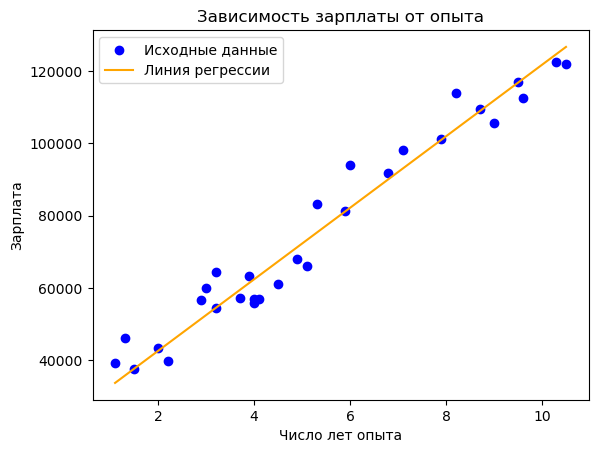

In [40]:
df = pd.read_csv( r"C:\Users\Igor\Downloads\asset-v1_SkillFactory+MIFIML-2sem+2025+type@asset+block@salary_data.csv" )

X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

print("Веса:", np.round(model.weights, 2))
print("Смещение:", np.round(model.bias, 2))

plt.scatter(X, Y, color='blue', label='Исходные данные')
plt.plot(X, Y_pred, color='orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()
plt.show()